<a href="https://colab.research.google.com/github/minhe8564/Assignment/blob/main/Machine-learning/231109_ConvolutionalNeuralNetwork_%EC%8B%A4%EC%8A%B5_BaseCode/231109_Basecode_LeNet5_CIFAR10.ipynb231109_Basecode_LeNet5_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 패키지 선언

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dataset
import torchvision.transforms as transform
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

## Dataset 다운로드

In [2]:
# Training dataset 다운로드
cifar10_train = dataset.CIFAR10(root = "./",
                            train = True,
                            transform = transform.ToTensor(),
                            download = True)
# Testing dataset 다운로드
cifar10_test = dataset.CIFAR10(root = "./",
                            train = False,
                            transform = transform.ToTensor(),
                            download = True)

dataLabel = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

100%|██████████| 170498071/170498071 [00:12<00:00, 13281033.98it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


## LeNet5 모델 정의
- Fully Connected Layer -> nn.Linear(in_features, out_features)
- Convolutional Layer -> nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
- ReLU -> nn.ReLU()
- Max Pooling -> nn.MaxPool2d(kernel_size, stride)


In [8]:
class LeNet5(nn.Module):

  def __init__(self):
    super(LeNet5, self).__init__()
    # 신경망 파라미터 초기화 (Conv 2개, FC 3개, ReLU, MaxPool)
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
    self.relu = nn.ReLU()
    self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)

    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)

    self.fc1 = nn.Linear(in_features=400, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=84)
    self.fc3 = nn.Linear(in_features=84, out_features=10)

  def forward(self, x):
    #-----------------------------------------------------------------
    # Convolution, MaxPool layer 추가 필요 (발표 자료 중 1~6번)
    # 하나의 레이어를 지나가게 됨
    y = self.conv1(x)
    y = self.relu(y)
    y = self.max_pool(y)

    # 두번째 레이어
    y = self.conv2(y)
    y = self.relu(y)
    y = self.max_pool(y)

    #-----------------------------------------------------------------

    y = y.view(-1, 400) # feature map 평탄화

    #-----------------------------------------------------------------
    # Fully Connected layer 추가 필요 (발표 자료 중 8~12번)
    y = self.fc1(y)
    y = self.relu(y)

    y = self.fc2(y)
    y = self.relu(y)

    y = self.fc3(y)

    #-----------------------------------------------------------------

    return y


In [5]:
class VGG(nn.Module):

  def __init__(self):
    super(VGG, self).__init__()
    # 신경망 파라미터 초기화
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=0)
    self.relu = nn.ReLU()
    self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0)
    self.avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)

    self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=0)
    self.relu = nn.ReLU()
    self.conv4 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=0)
    self.avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)

    self.conv5 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=0)
    self.relu = nn.ReLU()
    self.conv6 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=0)
    self.avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)

    self.fc1 = nn.Linear(in_features=512, out_features=256)
    self.fc2 = nn.Linear(in_features=256, out_features=256)
    self.fc3 = nn.Linear(in_features=256, out_features=10)

    def forward(self, x):
      y = self.conv1(x)
      y = self.relu(y)
      y = self.conv2(y)
      y = self.avg_pool(y)

      y = self.conv3(y)
      y = self.relu(y)
      y = self.conv4(y)
      y = self.avg_pool(y)

      y = self.conv5(y)
      y = self.relu(y)
      y = self.conv6(y)
      y = self.avg_pool(y)

      y = y.view(-1, 512) # feature map 평탄화

      y = self.fc1(y)
      y = self.relu(y)

      y = self.fc2(y)
      y = self.relu(y)

      y = self.fc3(y)

      return y

## Hyper-parameters 지정

In [9]:
batch_size = 100
learning_rate = 0.1
training_epochs = 15
loss_function = nn.CrossEntropyLoss()
network = LeNet5().to('cuda')
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

data_loader = DataLoader(dataset=cifar10_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

## CNN 학습을 위한 반복문 선언

In [10]:
network.train()
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:
    img = img.to('cuda')
    label = label.to('cuda')
    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad() # gradient 초기화
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch

  print('Epoch: %d Loss = %f'%(epoch+1, avg_cost))

print('Learning finished')

Epoch: 1 Loss = 2.155944
Epoch: 2 Loss = 1.820700
Epoch: 3 Loss = 1.590907
Epoch: 4 Loss = 1.450726
Epoch: 5 Loss = 1.354829
Epoch: 6 Loss = 1.287580
Epoch: 7 Loss = 1.226455
Epoch: 8 Loss = 1.186185
Epoch: 9 Loss = 1.137254
Epoch: 10 Loss = 1.092151
Epoch: 11 Loss = 1.059595
Epoch: 12 Loss = 1.024546
Epoch: 13 Loss = 0.990353
Epoch: 14 Loss = 0.960652
Epoch: 15 Loss = 0.934967
Learning finished


## 학습이 완료된 모델을 이용해 정답률 확인

In [11]:
network.eval()
network = network.to('cpu')
img_test = torch.tensor(np.transpose(cifar10_test.data,(0,3,1,2))) / 255.
label_test = torch.tensor(cifar10_test.targets)

with torch.no_grad(): # test에서는 기울기 계산 제외
  prediction = network(img_test) # 전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.6043999791145325


## 예측 결과 확인

tensor([[ 0.4611, -3.4092,  1.8313,  0.6334,  2.9876,  0.2003, -3.9341,  3.1724,
         -1.6940, -1.2015]])
horse


<function matplotlib.pyplot.show(close=None, block=None)>

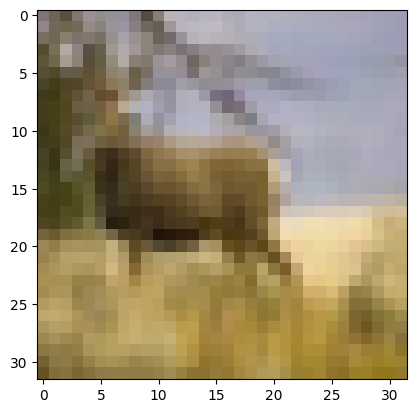

In [12]:
dataIdx = 1919
tmp_img = img_test[dataIdx]
tmp_label = label_test[dataIdx]

with torch.no_grad():
  prediction = network(tmp_img)

prediction_num = torch.argmax(prediction, 1)

print(prediction)
print(dataLabel[prediction_num])

plt.imshow(np.transpose(tmp_img,(1,2,0)))
plt.show